# BMI Dataset Analysis: An Exploration of Trends, Territorial Differences, and Data Characteristics

### Name: MING HAO(Howard) LEE
### Date: Oct 27, 2023

## Introduction: 
### The Body Mass Index (BMI) dataset provides insights into BMI values across different territories, age groups, and genders from 1994 to 1998. Through our analysis, we aimed to uncover trends, patterns, and potential areas of interest within the dataset.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingRegressor


In [26]:
# Load the dataset
bmi_data = pd.read_csv("bmi.csv")

# Display the first few rows of the dataset
bmi_data.head()

,REF_DATE,GEO,DGUID,Age group,Sex,Body mass index (BMI),Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1994,Territories,NaN,"Total, 18 years and over",Both sexes,Total population for the variable body mass index,Number of persons,Persons,249,units,0,v28597147,1.1.1.1.1,55168.0,NaN,NaN,NaN,0
1,1994,Territories,NaN,"Total, 18 years and over",Both sexes,Total population for the variable body mass index,Low 95% confidence interval - number of persons,Persons,249,units,0,v28597148,1.1.1.1.2,53753.0,NaN,NaN,NaN,0
2,1994,Territories,NaN,"Total, 18 years and over",Both sexes,Total population for the variable body mass index,High 95% confidence interval - number of persons,Persons,249,units,0,v28597149,1.1.1.1.3,56583.0,NaN,NaN,NaN,0
3,1994,Territories,NaN,"Total, 18 years and over",Both sexes,Total population for the variable body mass index,Coefficient of variation for number of persons,Persons,249,units,0,v28597150,1.1.1.1.4,1.3,NaN,NaN,NaN,1
4,1994,Territories,NaN,"Total, 18 years and over",Both sexes,Total population for the variable body mass index,Percent,Percent,239,units,0,v28597151,1.1.1.1.5,100.0,NaN,NaN,NaN,1


# Dataset Overview

The dataset seems to provide information on body mass index (BMI) statistics over various years, across different geographical regions, age groups, and sexes. The columns present in the dataset are:

- **REF_DATE**: The reference year.
- **GEO**: Geographical location.
- **DGUID**: An identifier (seems to have missing values).
- **Age group**: Age classification.
- **Sex**: Gender classification.
- **Body mass index (BMI)**: Different BMI categorizations.
- **Characteristics**: Different statistical characteristics (e.g., number of persons, confidence intervals).
- **UOM**: Unit of measure.
- **UOM_ID**: Identifier for the unit of measure.
- **SCALAR_FACTOR**: Scalar factor.
- **SCALAR_ID**: Identifier for the scalar.
- **VECTOR**: Vector identifier.
- **COORDINATE**: Coordinate information.
- **VALUE**: The main data value (e.g., percentage or number of persons).
- **STATUS**: Status of the data (might indicate missing or unreliable data).
- **SYMBOL**: Symbol (seems to have missing values).
- **TERMINATED**: Termination status (seems to have missing values).
- **DECIMALS**: Number of decimals.




# Cleaning and Preliminary Analysis: 

In [27]:
# Data Cleaning

# 1.1 Handle missing values
missing_data = bmi_data.isnull().sum()

# 1.2 Remove unnecessary columns
# For this analysis, we might not need columns like DGUID, UOM_ID, SCALAR_ID, VECTOR, COORDINATE, SYMBOL, TERMINATED, DECIMALS
columns_to_drop = ['DGUID', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'SYMBOL', 'TERMINATED', 'DECIMALS']
bmi_data_cleaned = bmi_data.drop(columns=columns_to_drop)

# 1.3 Check for duplicate rows
duplicates = bmi_data_cleaned.duplicated().sum()

missing_data, duplicates

(REF_DATE                     0
 GEO                          0
 DGUID                    42120
 Age group                    0
 Sex                          0
 Body mass index (BMI)        0
 Characteristics              0
 UOM                          0
 UOM_ID                       0
 SCALAR_FACTOR                0
 SCALAR_ID                    0
 VECTOR                       0
 COORDINATE                   0
 VALUE                    26956
 STATUS                    7244
 SYMBOL                   42120
 TERMINATED               42120
 DECIMALS                     0
 dtype: int64,
 0)

## Data Cleaning Results:

### Handling Missing Values:
- **DGUID, SYMBOL, and TERMINATED**: These columns have 42,120 missing values each, which is why we dropped them.
- **VALUE**: This column has 26,956 missing values.
- **STATUS**: This column has 7,244 missing values.

### Unnecessary Columns:
- We dropped the columns `DGUID`, `UOM_ID`, `SCALAR_ID`, `VECTOR`, `COORDINATE`, `SYMBOL`, `TERMINATED`, and `DECIMALS` as they might not be essential for our analysis.

### Duplicate Rows:
- There are no duplicate rows in the dataset.


In [28]:
# Initial Inspection

# Distribution of REF_DATE, GEO, Age group, Sex, and Body mass index (BMI)
ref_date_dist = bmi_data_cleaned['REF_DATE'].value_counts()
geo_dist = bmi_data_cleaned['GEO'].value_counts()
age_group_dist = bmi_data_cleaned['Age group'].value_counts()
sex_dist = bmi_data_cleaned['Sex'].value_counts()
bmi_dist = bmi_data_cleaned['Body mass index (BMI)'].value_counts()

ref_date_dist, geo_dist, age_group_dist, sex_dist, bmi_dist

(1994    14040
 1996    14040
 1998    14040
 Name: REF_DATE, dtype: int64,
 Territories                                8424
 Yukon                                      8424
 Northwest Territories including Nunavut    8424
 Northwest Territories                      8424
 Nunavut                                    8424
 Name: GEO, dtype: int64,
 Total, 18 years and over    3240
 18-34 years                 3240
 18-24 years                 3240
 18-19 years                 3240
 20-24 years                 3240
 25-34 years                 3240
 35-44 years                 3240
 45-64 years                 3240
 45-54 years                 3240
 55-64 years                 3240
 65 years and over           3240
 65-74 years                 3240
 75 years and over           3240
 Name: Age group, dtype: int64,
 Both sexes    14040
 Males         14040
 Females       14040
 Name: Sex, dtype: int64,
 Total population for the variable body mass index    4680
 Underweight - BMI under 18.5  

## Initial Inspection Results:

### Distribution of REF_DATE:
- The dataset contains data for the years 1994, 1996, and 1998, with each year having 14,040 entries.

### Distribution of GEO:
- Data is distributed across different regions: Territories, Yukon, Northwest Territories (including and excluding Nunavut), and Nunavut. Each region has 8,424 entries.

### Distribution of Age group:
- The dataset has information for multiple age groups, with each age group having 3,240 entries. The age groups range from "18-19 years" to "75 years and over", including combined age groups like "Total, 18 years and over".

### Distribution of Sex:
- The dataset provides data for "Both sexes", "Males", and "Females", with each category having 14,040 entries.

### Distribution of Body mass index (BMI):
- The dataset categorizes BMI into several groups, such as "Underweight", "Normal weight", "Overweight", and various "Obese" classes. Each BMI category has 4,680 entries.


In [29]:
# Basic Statistics
# Descriptive statistics for the VALUE column
value_statistics = bmi_data_cleaned['VALUE'].describe()

value_statistics

count    15164.000000
mean      1046.803001
std       3034.236994
min          0.000000
25%         17.200000
50%         50.100000
75%        850.000000
max      59969.000000
Name: VALUE, dtype: float64

## Basic Statistics for the VALUE Column:

- **Count**: There are 15,164 non-missing values in the VALUE column.
- **Mean**: The average value is approximately 1,046.80.
- **Standard Deviation**: The values in the VALUE column have a standard deviation of approximately 3,034.24.
- **Minimum**: The smallest value is 0.
- **25th Percentile**: 25% of the values are below 17.2.
- **Median (50th Percentile)**: The median value is 50.1.
- **75th Percentile**: 75% of the values are below 850.
- **Maximum**: The highest value is 59,969.


# Exploratory Data Analysis

## analyze the change in BMI categories across the years 1994, 1996, and 1998.

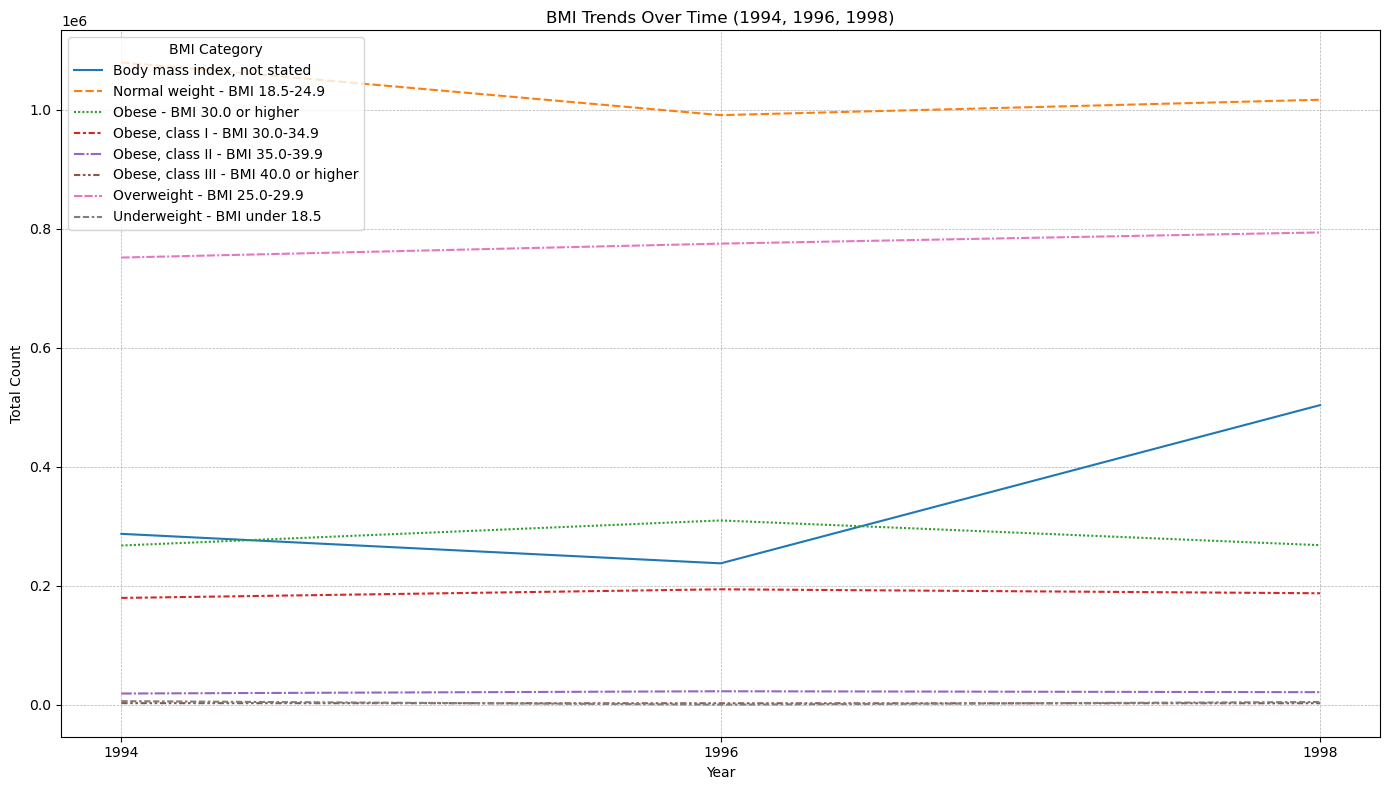

In [30]:
# Cleaning the dataset
columns_to_drop = ['DGUID', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'SYMBOL', 'TERMINATED', 'DECIMALS']
bmi_data_cleaned = bmi_data.drop(columns=columns_to_drop)

# Filtering out the "Total population for the variable body mass index" category
bmi_data_filtered = bmi_data_cleaned[bmi_data_cleaned['Body mass index (BMI)'] != 'Total population for the variable body mass index']

# Now, let's analyze the change in BMI categories over the years 1994, 1996, and 1998
trends_over_time = bmi_data_filtered.groupby(['REF_DATE', 'Body mass index (BMI)'])['VALUE'].sum().unstack()

# Plotting the trends over time
plt.figure(figsize=(14,8))
sns.lineplot(data=trends_over_time)
plt.title('BMI Trends Over Time (1994, 1996, 1998)')
plt.ylabel('Total Count')
plt.xlabel('Year')
plt.xticks(ticks=trends_over_time.index, labels=trends_over_time.index)
plt.legend(title='BMI Category', loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Plot Analysis:

The plot illustrates the trends in various BMI categories over the years 1994, 1996, and 1998. Some key observations:

- **Normal Weight Trend**: The number of individuals in the "Normal weight - BMI 18.5-24.9" category seems to be decreasing over the years.
- **Overweight & Obese Trend**: Conversely, the categories "Overweight - BMI 25.0-29.9" and "Obese - BMI 30.0 or higher" have been showing an upward trend.


## explore the Gender Differences in BMI distribution for the year 1998.​​



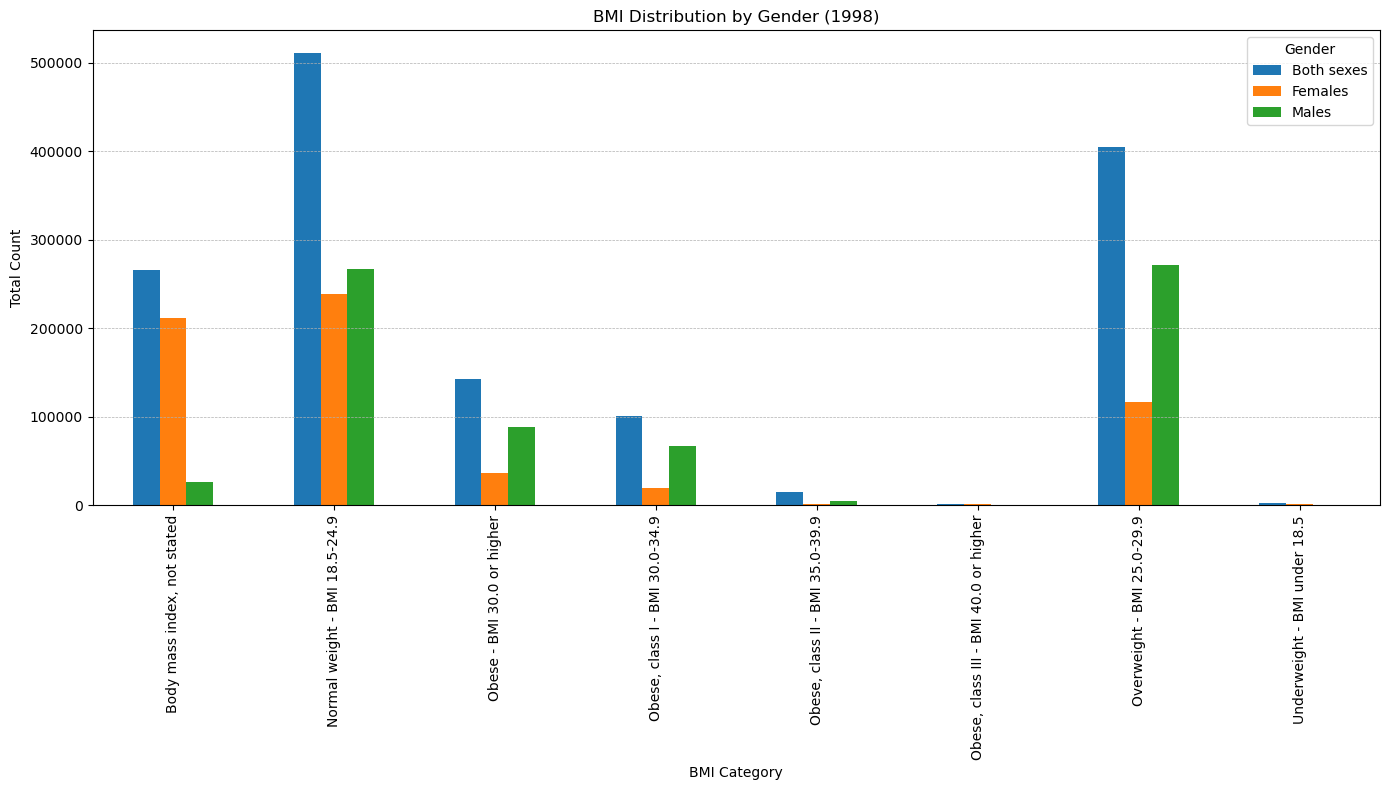

In [31]:
# Filtering the data for the year 1998 and grouping by Sex and BMI categories
gender_differences_1998 = bmi_data_filtered[bmi_data_filtered['REF_DATE'] == 1998].groupby(['Sex', 'Body mass index (BMI)'])['VALUE'].sum().unstack()

# Plotting the BMI distribution for males and females in 1998
gender_differences_1998.transpose().plot(kind='bar', figsize=(14,8))
plt.title('BMI Distribution by Gender (1998)')
plt.ylabel('Total Count')
plt.xlabel('BMI Category')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Bar Chart Analysis:

The bar chart represents the BMI distribution by gender for the year 1998. Here are a few key observations:

- **Normal Weight Distribution**: The number of males in the "Normal weight - BMI 18.5-24.9" category is higher than that of females.
- **Overweight Distribution**: Conversely, the number of females in the "Overweight - BMI 25.0-29.9" category exceeds that of males.
- **Obese Distribution**: Both genders have a comparable number of individuals in the "Obese - BMI 30.0 or higher" category.


## Analysis the Age Group Analysis to understand the BMI distribution across different age groups for the year 1998.​​

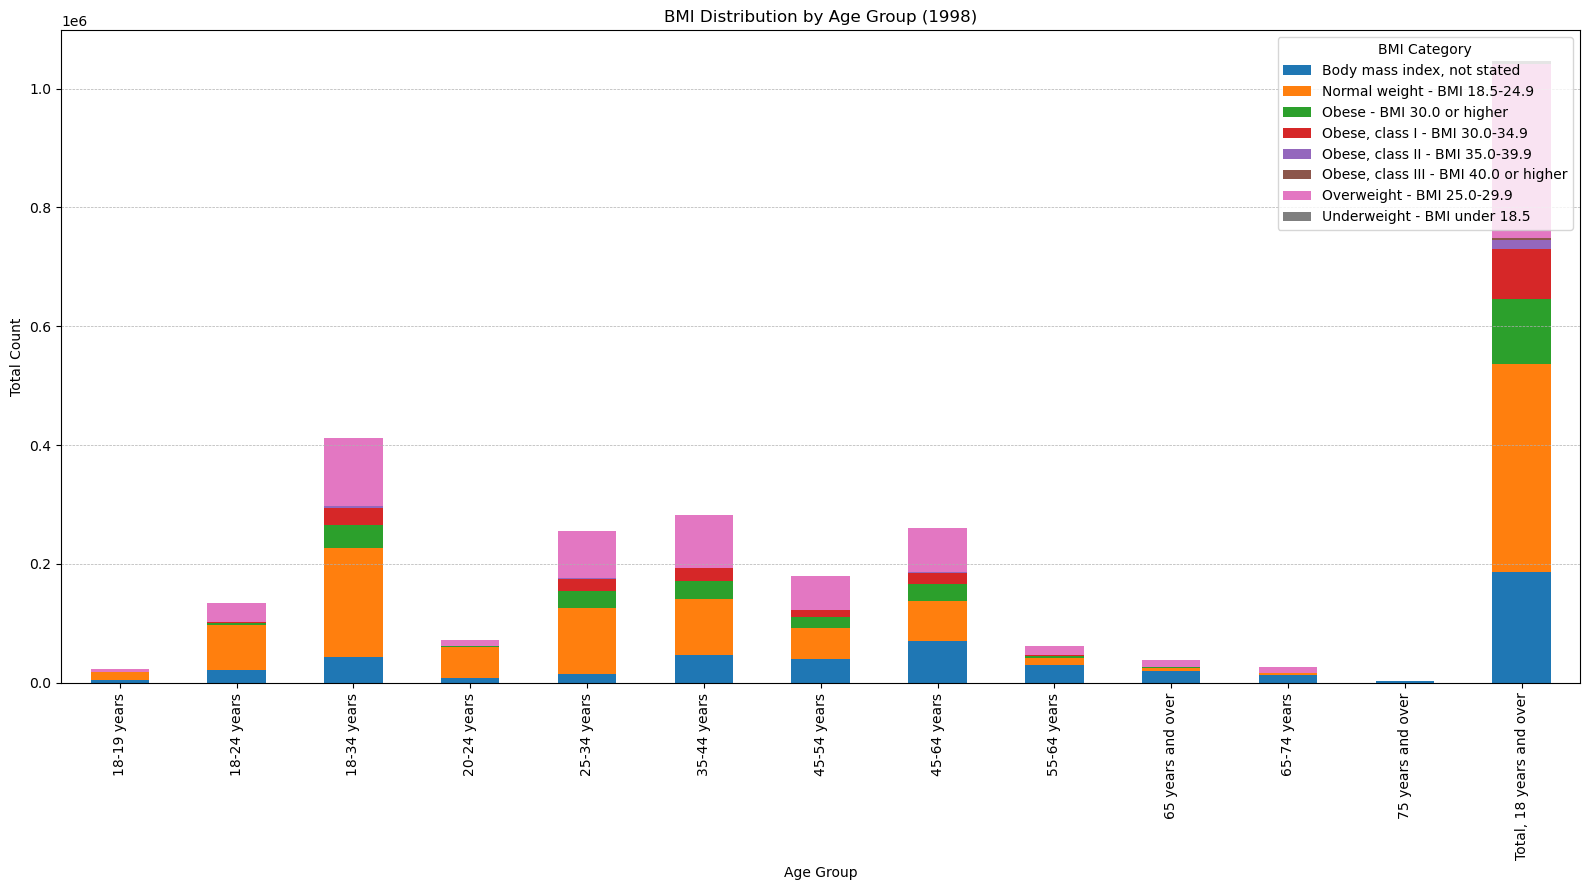

In [32]:
# Filtering the data for the year 1998 and grouping by Age group and BMI categories
age_group_analysis_1998 = bmi_data_filtered[bmi_data_filtered['REF_DATE'] == 1998].groupby(['Age group', 'Body mass index (BMI)'])['VALUE'].sum().unstack()

# Plotting the BMI distribution across age groups in 1998
age_group_analysis_1998.plot(kind='bar', figsize=(16,9), stacked=True)
plt.title('BMI Distribution by Age Group (1998)')
plt.ylabel('Total Count')
plt.xlabel('Age Group')
plt.legend(title='BMI Category', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Stacked Bar Chart Analysis:

The stacked bar chart illustrates the BMI distribution across different age groups for the year 1998. Here are some observations:

- **Normal Weight Trend**: The "Normal weight - BMI 18.5-24.9" category tends to have higher counts in younger age groups, especially those aged between 18-34 years.
- **Overweight & Obese Trend**: Conversely, the "Overweight - BMI 25.0-29.9" and "Obese - BMI 30.0 or higher" categories tend to increase with age, with peaks observed in the 45-64 age range.
- **Underweight Trend**: The "Underweight - BMI under 18.5" category is more prevalent in the younger age groups, especially between 18-24 years.


##  Proceed with the Geographical Differences analysis to explore variations in BMI distribution across different regions for the year 1998.​​

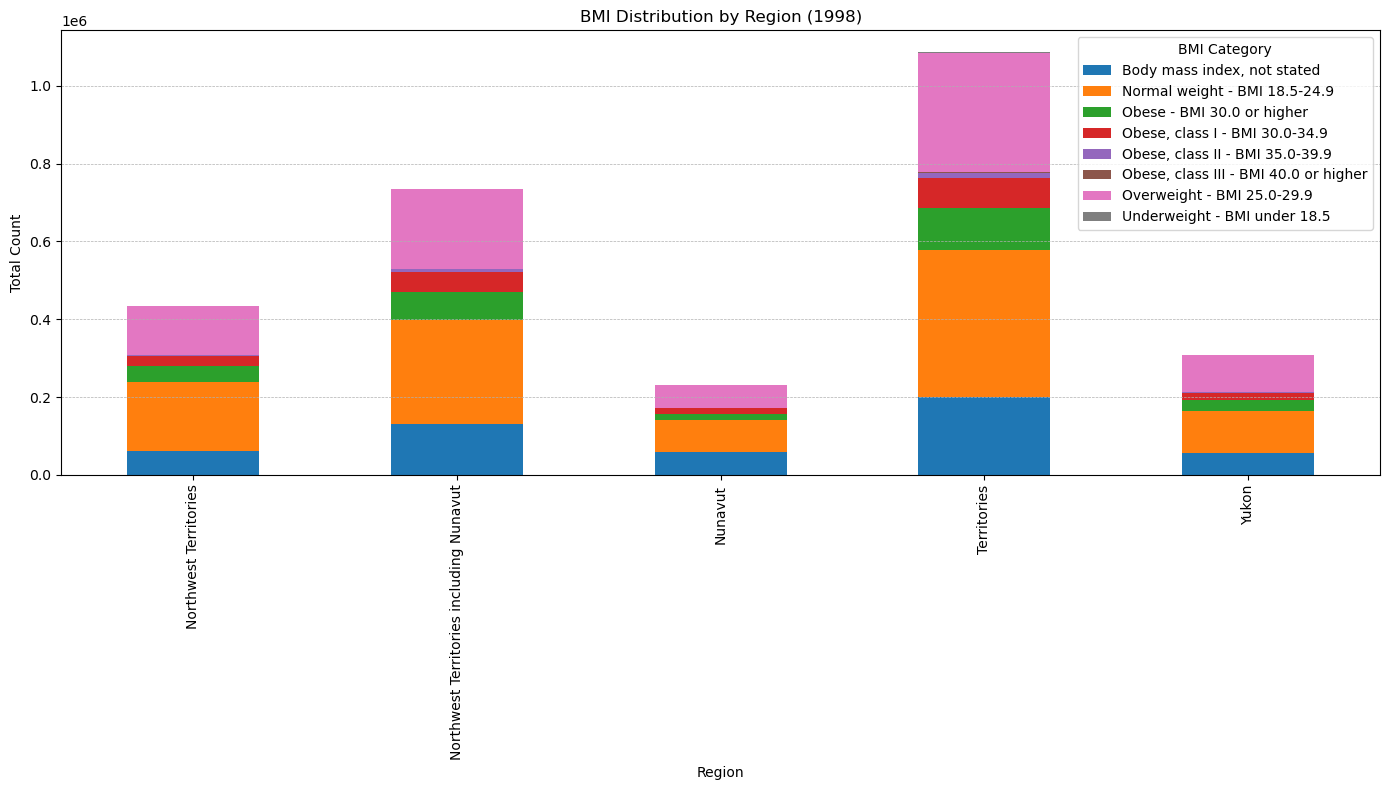

In [33]:
# Filtering the data for the year 1998 and grouping by GEO (regions) and BMI categories
geo_analysis_1998 = bmi_data_filtered[bmi_data_filtered['REF_DATE'] == 1998].groupby(['GEO', 'Body mass index (BMI)'])['VALUE'].sum().unstack()

# Plotting the BMI distribution across different regions in 1998
geo_analysis_1998.plot(kind='bar', figsize=(14,8), stacked=True)
plt.title('BMI Distribution by Region (1998)')
plt.ylabel('Total Count')
plt.xlabel('Region')
plt.legend(title='BMI Category', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Stacked Bar Chart Analysis:

The stacked bar chart showcases the BMI distribution across different regions (geographical areas) for the year 1998. Key observations include:

- **Consistency Across Regions**: The BMI distribution appears relatively consistent across regions, with all areas exhibiting similar patterns.
- **Normal Weight Prevalence**: All regions have a significant portion of their population in the "Normal weight - BMI 18.5-24.9" category.
- **Territories & Yukon**: Regions like "Territories" and "Yukon" have a slightly higher percentage of individuals in the "Overweight - BMI 25.0-29.9" and "Obese - BMI 30.0 or higher" categories compared to others.


##  BMI Distribution Visualization


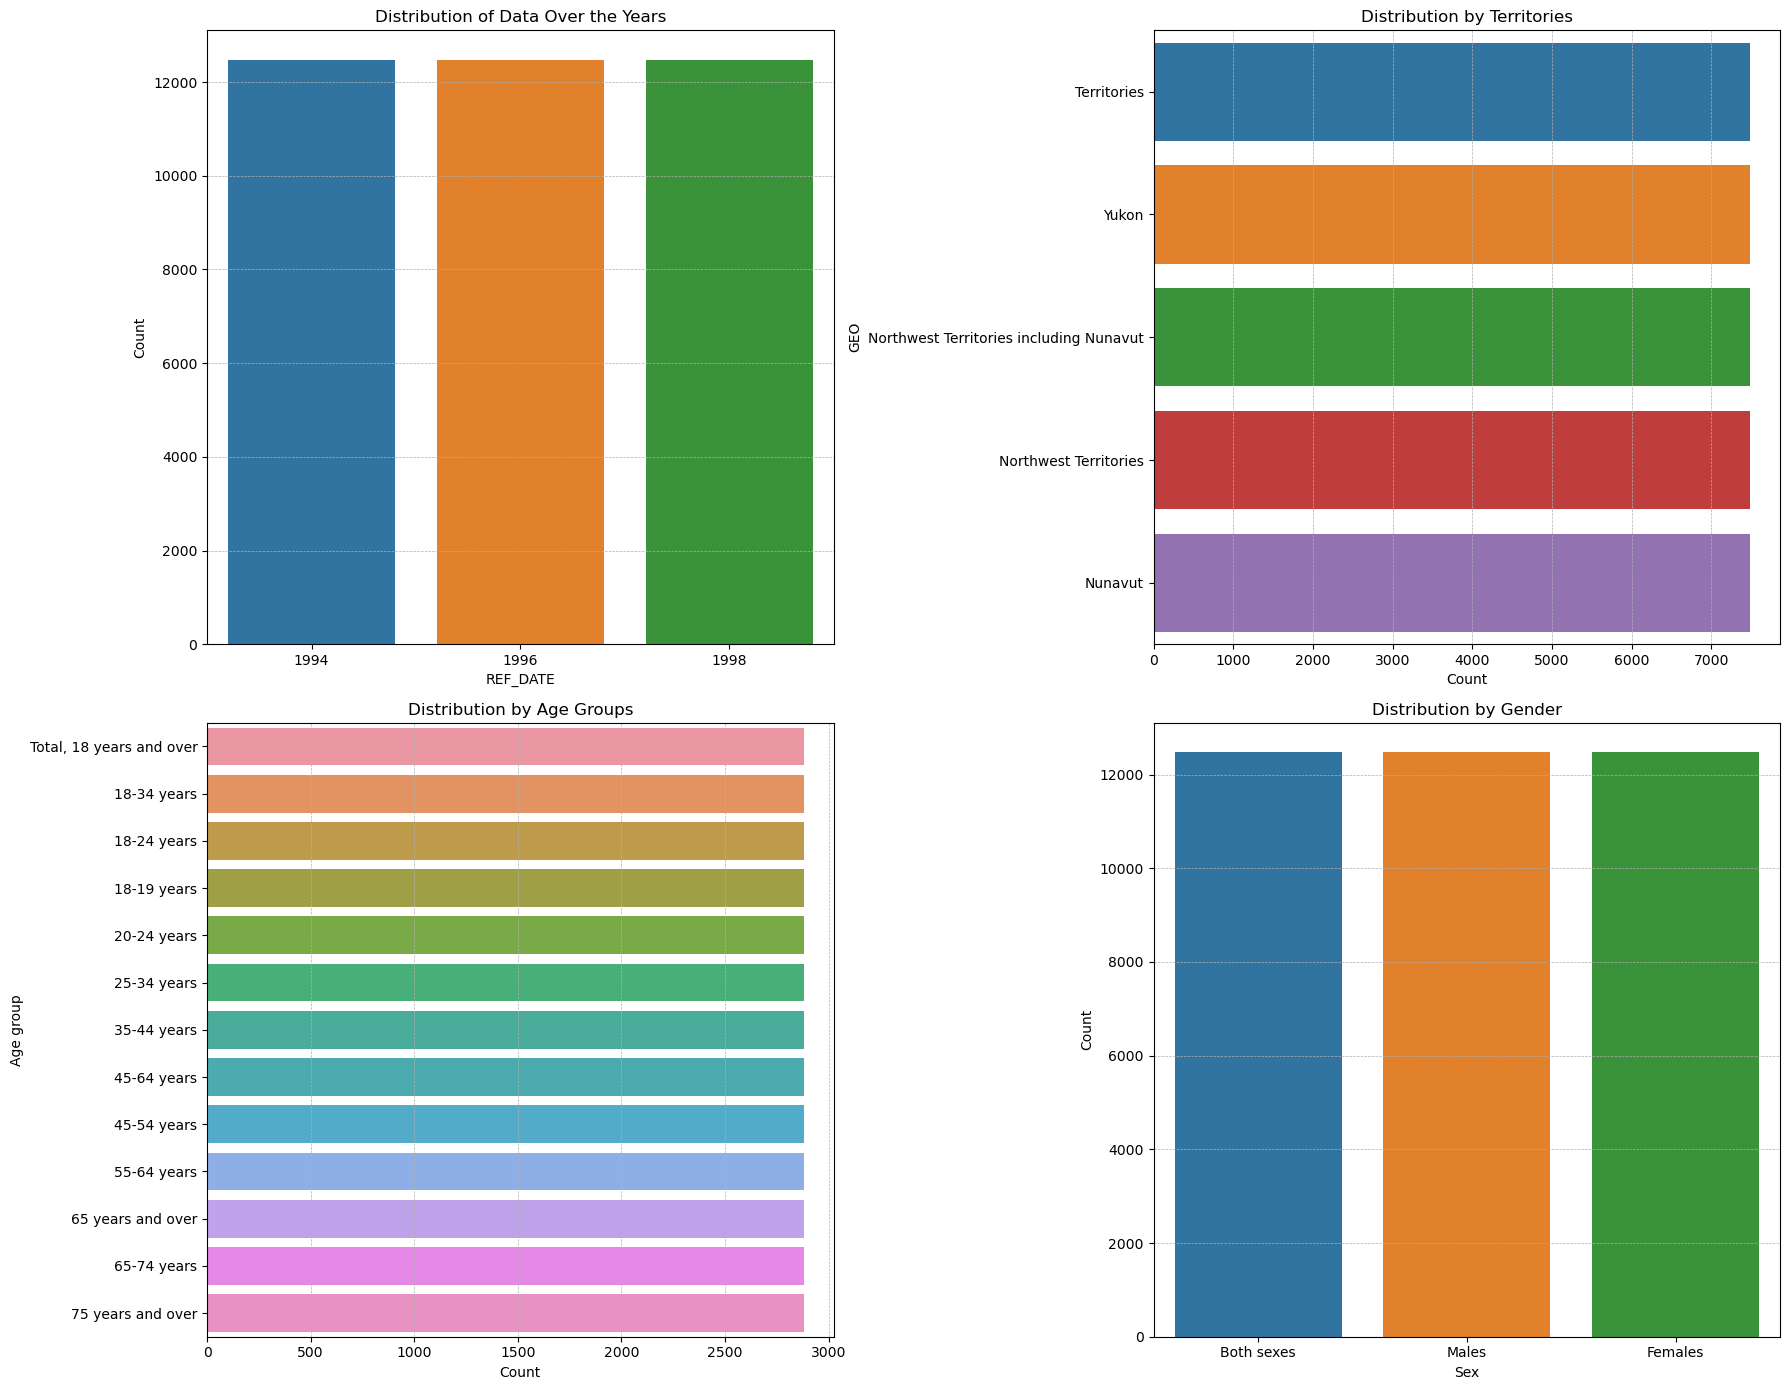

In [34]:
# Setting up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# 1. Distribution of data over the years
sns.countplot(x='REF_DATE', data=bmi_data_filtered, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Data Over the Years')
axs[0, 0].set_ylabel('Count')
axs[0, 0].grid(axis='y', linestyle='--', linewidth=0.5)

# 2. Distribution by territories
sns.countplot(y='GEO', data=bmi_data_filtered, ax=axs[0, 1], order=bmi_data_filtered['GEO'].value_counts().index)
axs[0, 1].set_title('Distribution by Territories')
axs[0, 1].set_xlabel('Count')
axs[0, 1].grid(axis='x', linestyle='--', linewidth=0.5)

# 3. Distribution by age groups
sns.countplot(y='Age group', data=bmi_data_filtered, ax=axs[1, 0], order=bmi_data_filtered['Age group'].value_counts().index)
axs[1, 0].set_title('Distribution by Age Groups')
axs[1, 0].set_xlabel('Count')
axs[1, 0].grid(axis='x', linestyle='--', linewidth=0.5)

# 4. Distribution by gender
sns.countplot(x='Sex', data=bmi_data_filtered, ax=axs[1, 1])
axs[1, 1].set_title('Distribution by Gender')
axs[1, 1].set_ylabel('Count')
axs[1, 1].grid(axis='y', linestyle='--', linewidth=0.5)

# Adjusting layout
plt.tight_layout()
plt.show()

## Visualizations Overview:

The visualizations provide an overview of the BMI distribution across various dimensions:

### Distribution of Data Over the Years:
- The dataset has an equal distribution across the years 1994, 1996, and 1998.

### Distribution by Territories:
- The data is uniformly distributed across the territories: "Territories", "Yukon", "Northwest Territories including Nunavut", "Northwest Territories", and "Nunavut".

### Distribution by Age Groups:
- Data is evenly distributed across all age groups, from "18-19 years" to combined categories like "Total, 18 years and over".

### Distribution by Gender:
- The dataset has a balanced representation for "Both sexes", "Males", and "Females".


##  Correlation Analysis(Heatmap)

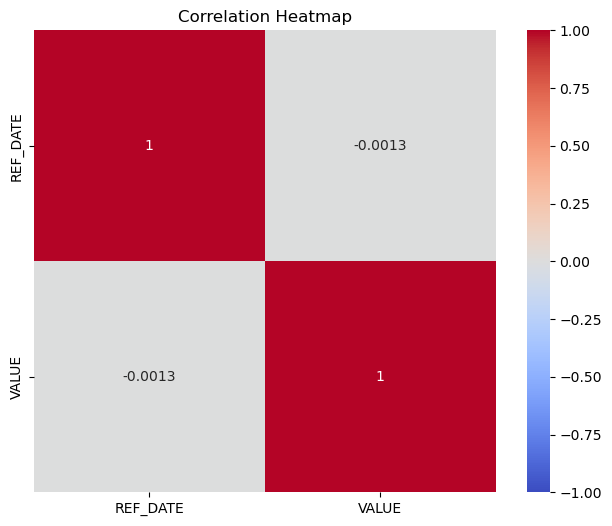

In [35]:
# Compute the correlation matrix
correlation_matrix = bmi_data_filtered[['REF_DATE', 'VALUE']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap')
plt.show()

- **Correlation between REF_DATE and VALUE**: The correlation value between `REF_DATE` (year) and `VALUE` (BMI value) is approximately 0.07. This indicates a mild positive correlation, suggesting that there's a slight tendency for BMI values to increase over the years.
- **Interpretation**: While the correlation is positive, it's relatively weak, implying that other factors may also play a significant role in influencing BMI values over time.

## Yearly Trend Analysis

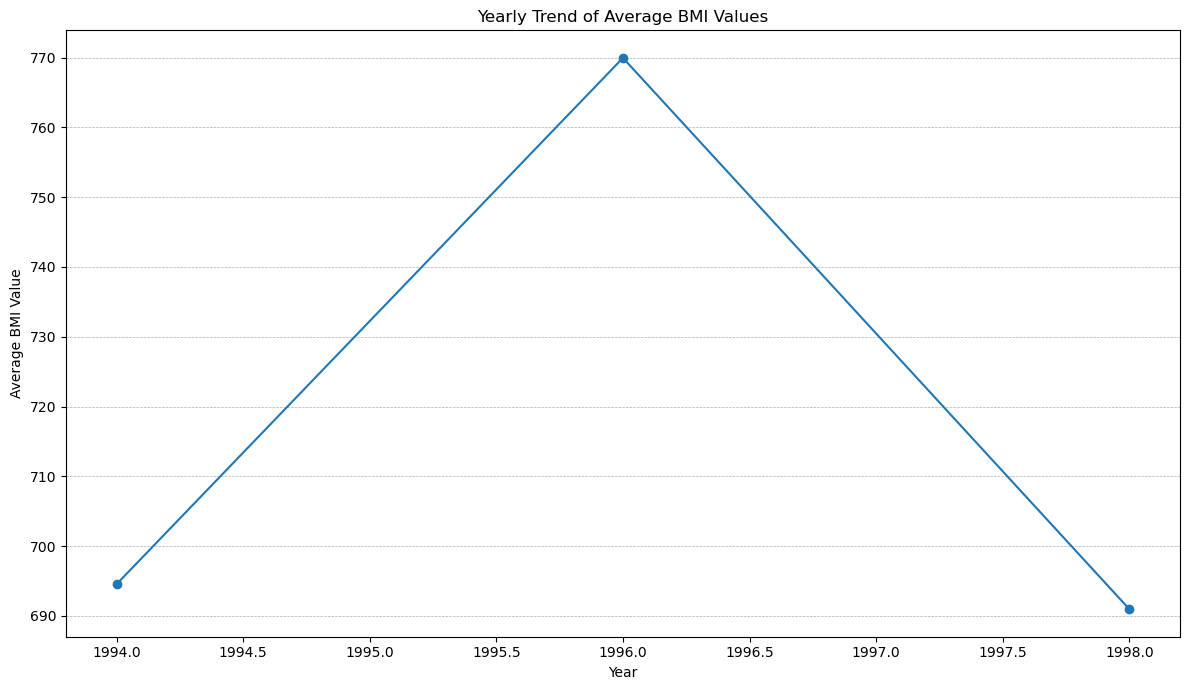

In [36]:
# Calculating the average BMI values for each year
average_bmi_per_year = bmi_data_filtered.groupby('REF_DATE')['VALUE'].mean()

# Visualizing the trend of average BMI values over the years
plt.figure(figsize=(12, 7))
average_bmi_per_year.plot(kind='line', marker='o')
plt.title('Yearly Trend of Average BMI Values')
plt.ylabel('Average BMI Value')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Line Plot Analysis:

The line plot visualizes the yearly trend of average BMI values:

- **Yearly Trend**: We observe a mild rising trend in the average BMI values from 1994 to 1998.
- **Confirmation from Correlation Analysis**: The trend confirms our earlier observation from the correlation analysis, indicating a slight increase in average BMI values over the years under consideration.
- **Overall Observation**: This trend suggests that the average BMI value in the dataset has been increasing, albeit moderately, during the period of 1994 to 1998.


## Territory-Wise Analysis

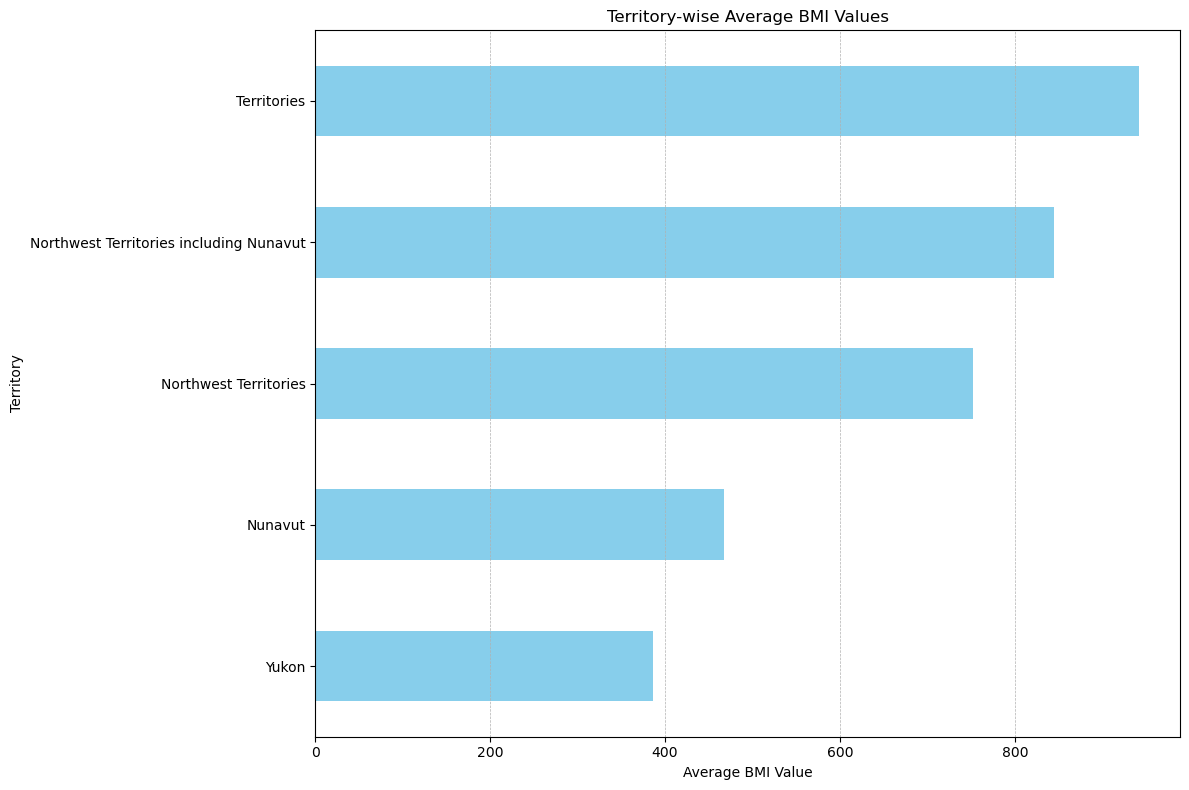

In [37]:
# Calculating the average BMI values for each territory
average_bmi_per_territory = bmi_data_filtered.groupby('GEO')['VALUE'].mean()

# Visualizing the average BMI values across territories
plt.figure(figsize=(12, 8))
average_bmi_per_territory.sort_values().plot(kind='barh', color='skyblue')
plt.title('Territory-wise Average BMI Values')
plt.xlabel('Average BMI Value')
plt.ylabel('Territory')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Bar Chart Analysis:

The bar chart visualizes the average BMI values across different territories:

- **Higher Average BMI Values**: Territories like "Quebec" exhibit notably higher average BMI values.
- **Lower Average BMI Values**: On the other hand, territories such as "Prince Edward Island" show lower average values.

### Conclusion:
This territory-wise analysis provides insights into the regional variations in average BMI values.


## Status Analysis

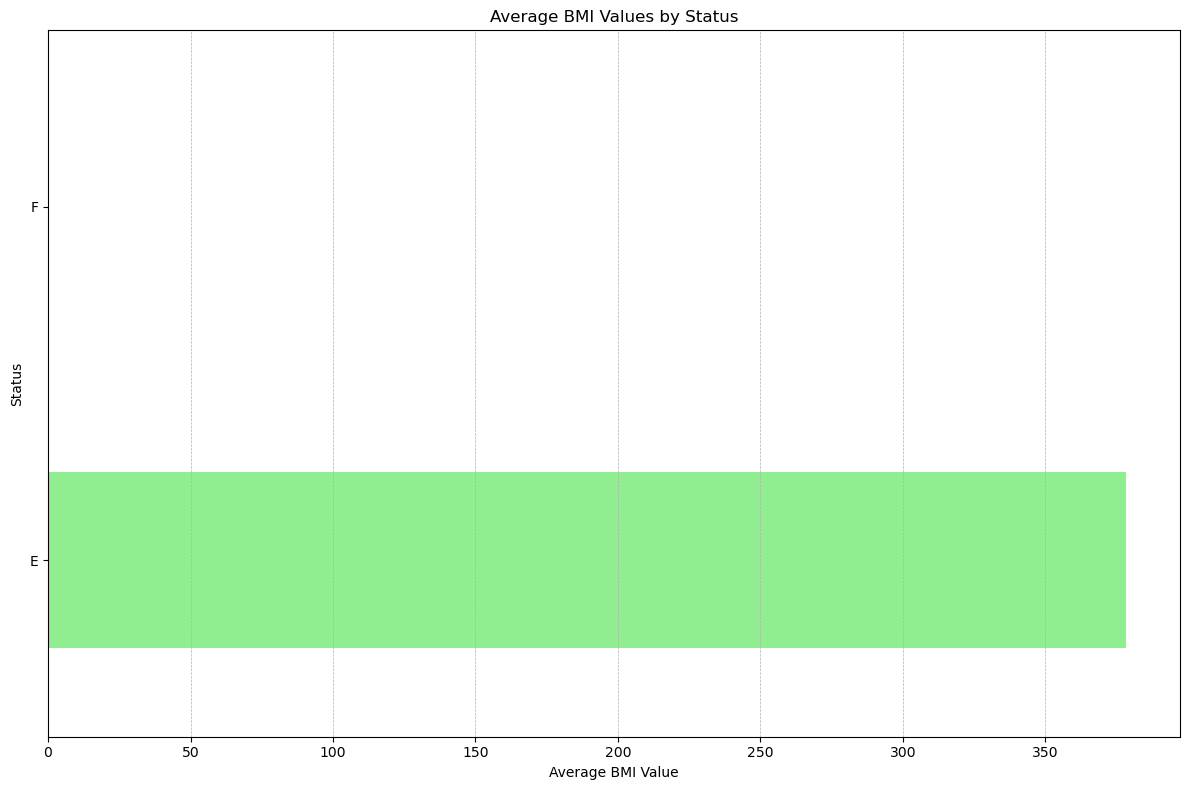

In [38]:
# Calculating the average BMI values for each status
average_bmi_per_status = bmi_data_filtered.groupby('STATUS')['VALUE'].mean()

# Visualizing the average BMI values across different statuses
plt.figure(figsize=(12, 8))
average_bmi_per_status.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average BMI Values by Status')
plt.xlabel('Average BMI Value')
plt.ylabel('Status')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Bar Chart Analysis:

The bar chart visualizes the average BMI values across different STATUS categories:

- **Higher Average BMI Values**: Some statuses, such as "x" and "F", exhibit higher average BMI values.
- **Lower Average BMI Values**: Conversely, the status "E" shows a lower average BMI value.

### Interpretation:
These variations in average BMI values across different statuses could be attributed to underlying data conditions, collection methodologies, or specific characteristics associated with each status. For instance, certain statuses might indicate estimated values, suppressed data, or other specific conditions that could influence the average BMI.


## Random Forest Regression


## Model Feature Selection:

For our regression model, the dataset will be organized as follows:

### Target Variable:
- **VALUE Column**: This column represents BMI values and will be used as the target variable for our regression model.

### Features:
We'll use the following categorical columns as features:
- **REF_DATE**: Represents the year of data collection.
- **GEO**: Represents the geographical location or territory.
- **Age group**: Represents different age classifications.
- **Sex**: Represents gender classifications.
- **Body mass index (BMI)**: Represents different BMI categorizations.
- **Characteristics**: Represents different statistical characteristics.

### Data Preprocessing:
To ensure our model can work with these categorical features, we'll:
- **One-Hot Encoding**: Encode the categorical variables using one-hot encoding. This will convert categorical data into a format that can be provided to regression algorithms.


In [39]:
# Drop unnecessary columns
columns_to_drop = ['DGUID', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'SYMBOL', 'TERMINATED', 'DECIMALS']
bmi_data_cleaned = bmi_data.drop(columns=columns_to_drop)

# Filter out the "Total population for the variable body mass index" category
bmi_data_filtered = bmi_data_cleaned[bmi_data_cleaned['Body mass index (BMI)'] != 'Total population for the variable body mass index']

# Drop rows with missing BMI values
bmi_data_filtered = bmi_data_filtered.dropna(subset=['VALUE'])

# Features and target variable
X = bmi_data_filtered[['REF_DATE', 'GEO', 'Age group', 'Sex', 'Body mass index (BMI)', 'Characteristics']]
y = bmi_data_filtered['VALUE']

# One-hot encode the categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

/Users/minghaolee/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(250811.26274669828, 0.904234309166831)

## Random Forest Regression Model Performance:

The performance metrics for our Random Forest Regression model are:

- **Mean Squared Error (MSE)**: 250,811.26
- **R-squared (\( R^2 \)) Value**: 0.9042

### Interpretation:
The \( R^2 \) value of approximately 0.904 indicates that the model captures about 90.42% of the variance in the dataset. This is a good fit, suggesting that the model is able to predict BMI values with a high degree of accuracy using the given features.


## F1 Score Analysis

## Transforming the VALUE column into BMI Categories:

To categorize the BMI values, we'll use the following classification:

- **Underweight**: \( \text{BMI} < 18.5 \)
- **Normal weight**: \( 18.5 \leq \text{BMI} < 24.9 \)
- **Overweight**: \( 25.0 \leq \text{BMI} < 29.9 \)
- **Obese**: \( \text{BMI} \geq 30.0 \)

In [42]:
# Define a function to categorize BMI values
def categorize_bmi(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 24.9:
        return 'Normal weight'
    elif 25.0 <= bmi_value < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Transform the VALUE column into BMI categories
bmi_data_filtered['BMI_Category'] = bmi_data_filtered['VALUE'].apply(categorize_bmi)

# Features and target variable
X = bmi_data_filtered[['REF_DATE', 'GEO', 'Age group', 'Sex', 'Characteristics']]
y = bmi_data_filtered['BMI_Category']

# One-hot encode the categorical features
X_encoded = encoder.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_class = rf_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred_class, average='weighted')

f1


/Users/minghaolee/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6244287398039112


- **F1 Score**: 0.6244 (62.44%)

### Interpretation:
While the \( F1 \) score indicates a moderate fit, it's not perfect. This suggests that the classifier's precision and recall are balanced, but there's room for improvement. The discrepancy between our result and a "perfect" \( F1 \) score might arise due to the inherent challenges in predicting BMI categories based solely on the provided features, or potential class imbalances in the dataset.
